# **Merging UAVSAR Data**
This Jupyter Notebook explores merging UAVSAR data over the Verdugo Mountains in Los Angeles, CA. The content of this notebook is as follows:

0. [Running the Notebook](#s1)
1. [Download UAVSAR Data](#s2)
2. [Read in Data](#s3)
3. [Merge](#s4)

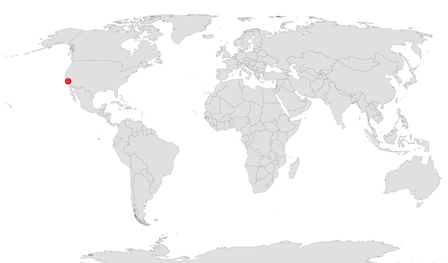

<a name="s1"></a>
## Running the Notebook
- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**.
- Code cells that are required for the notebook to run without errors are marked numerically with <font color='red'> Run cell below </font>

### Python Packages:
This routine uses the following python libraries. Some are already included in the Google Colab environment and others are installed in the cell below before imported. Downloading new python packages to this environment may take a few minutes to complete.

In [ ]:
## The packages will take around a minute to install
!pip install rasterio --quiet

import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


<a name="s2"></a>
# 1. Download UAVSAR Data

In [45]:
# UAVSAR Line SanAnd_26526 HV masked geotiffs
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Fire/SanAnd_26526_14092_007_140624_L090HVHV_CX_01_mask_15_70.tif  --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Fire/SanAnd_08525_14158_003_141023_L090HVHV_CX_01.tif   --quiet

## Line's corresponding local incidence angle files
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Fire/SanAnd_08525_inc_clip.tif --quiet

<a name="s3"></a>
## 2. Read in Data

Use the python package rasterio to open the UAVSAR Data

In [46]:
def read_file(path):
  with rio.open(path) as ds:
    band = ds.read(1)
    return band

## Read in masked data
HV2014_08525 = read_file('SanAnd_08525_14158_003_141023_L090HVHV_CX_01.tif')
HV2014_26526 = read_file('SanAnd_26526_14092_007_140624_L090HVHV_CX_01_mask_15_70.tif')
inc_angle = read_file('SanAnd_08525_inc_clip.tif')

Plot the two UAVSAR lines. Each line's low and high local incidence angles are masked above 70 degrees and below 15 degrees.

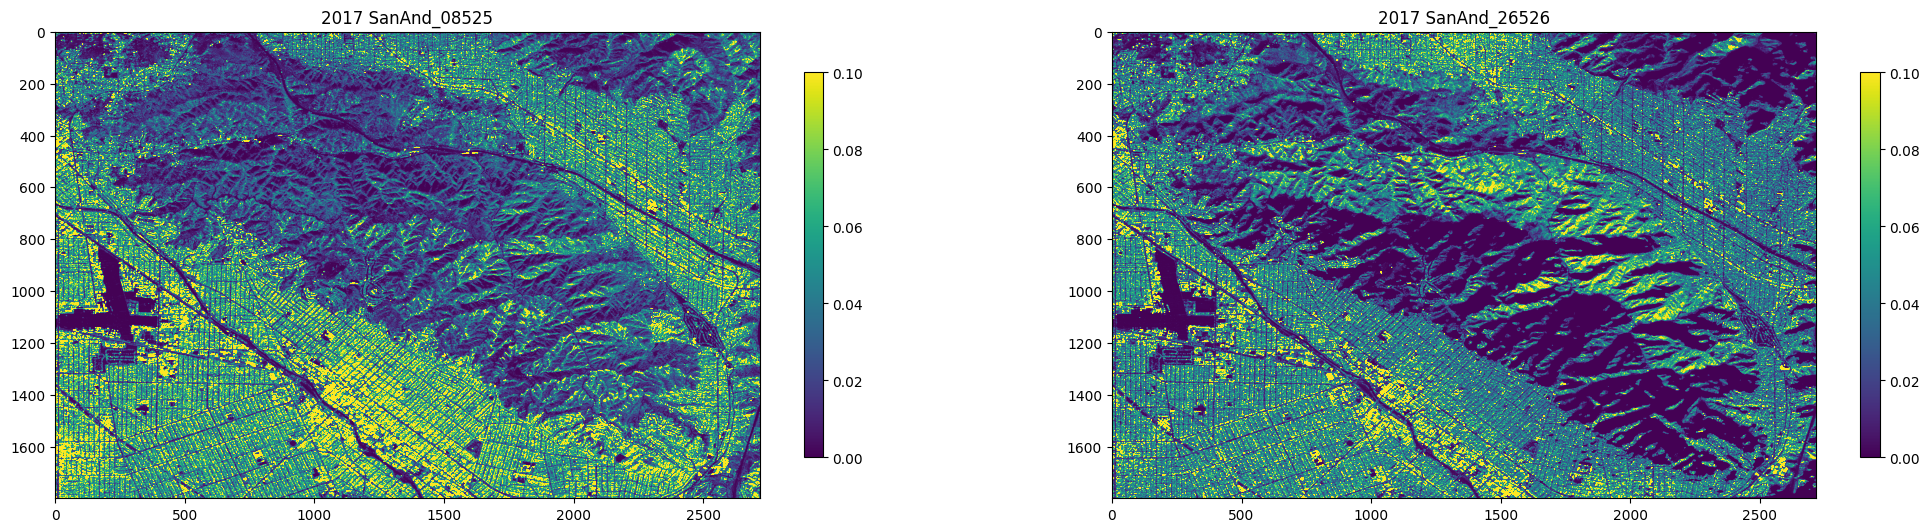

In [44]:
cmap = 'nipy_spectral_r'
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,10))

vmin_HV=0
vmax_HV=0.1

# 2014 SanAnd_08525
plot = ax1.imshow(HV2014_08525,vmin=vmin_HV, vmax=vmax_HV)#, cmap=cmap)
ax1.set_title('2017 SanAnd_08525')
fig.colorbar(plot, ax=ax1, shrink=0.5)

# 2014 SanAnd_26526
plot = ax2.imshow(HV2014_26526, vmin=vmin_HV, vmax=vmax_HV)#,cmap=cmap)
ax2.set_title('2017 SanAnd_26526')
fig.colorbar(plot, ax=ax2, shrink=0.5)

In [47]:
HV2014_08525[inc_angle<0.261799]=np.nan # Masking less than 15 degrees in radians
HV2014_08525[inc_angle>1.22173]=np.nan # Masking greater than 70 degrees in radians

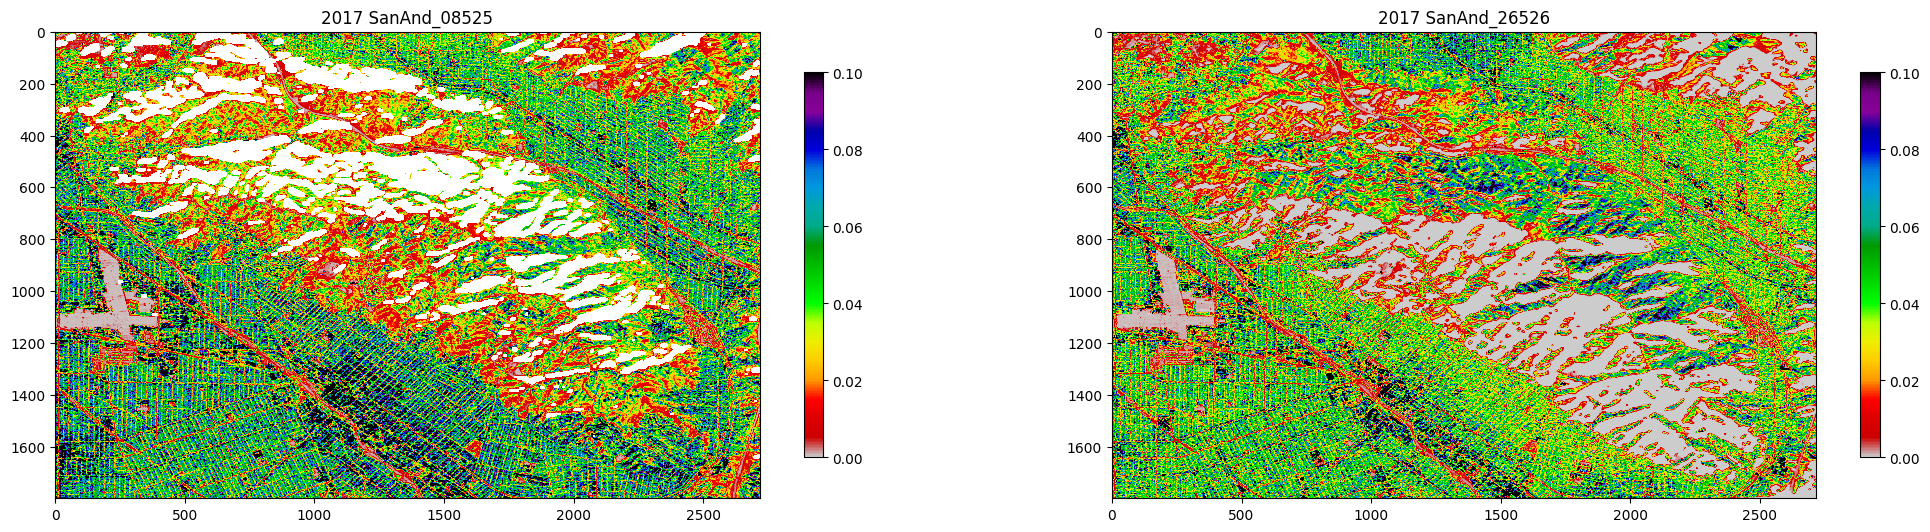

In [48]:
cmap = 'nipy_spectral_r'
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,10))

vmin_HV=0
vmax_HV=0.1

# 2014 SanAnd_08525
plot = ax1.imshow(HV2014_08525,vmin=vmin_HV, vmax=vmax_HV, cmap=cmap)
ax1.set_title('2017 SanAnd_08525')
fig.colorbar(plot, ax=ax1, shrink=0.5)

# 2014 SanAnd_26526
plot = ax2.imshow(HV2014_26526, vmin=vmin_HV, vmax=vmax_HV,cmap=cmap)
ax2.set_title('2017 SanAnd_26526')
fig.colorbar(plot, ax=ax2, shrink=0.5)

<a name="s4"></a>
## 2. Merge
Merge UAVSAR lines SanAnd_08525 & SanAnd_26526

In [38]:
from rasterio.merge import merge as rio_merge

# Merge UAVSAR lines SanAnd_08525 & SanAnd_26526
def custom_merge_works(old_data, new_data, old_nodata, new_nodata, index=None, roff=None, coff=None):
    old_data[:] = np.maximum(old_data, new_data)

# 2014
with rio.open('SanAnd_26526_14092_007_140624_L090HVHV_CX_01_mask_15_70.tif') as HV2014_26526, rio.open('SanAnd_08525_14158_003_141023_L090HVHV_CX_01.tif') as HV2014_08525:
    arr1, arr2 = HV2014_08525.read(), HV2014_26526.read()
    mosaic2014, out_trans = rio_merge([HV2014_08525, HV2014_26526], method=custom_merge_works)

Text(0.5, 1.0, '2014 UAVSAR HV Mosaic')

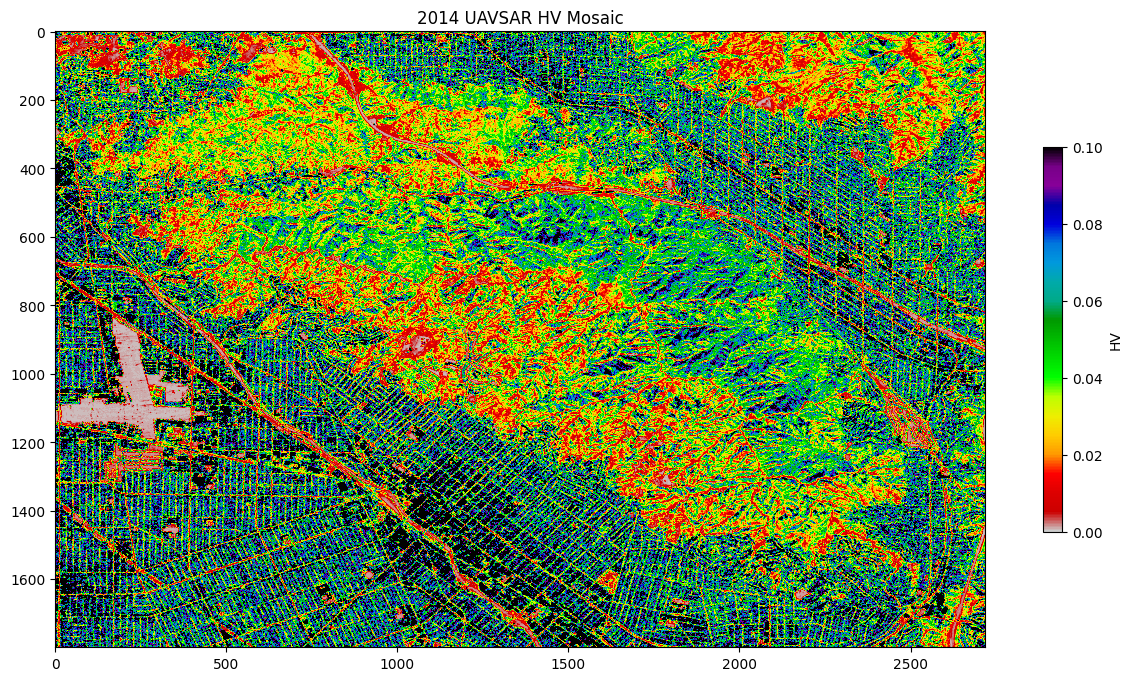

In [49]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(15,10))
plot2014 = ax.imshow(mosaic2014.squeeze(), vmin=0, vmax=0.1, cmap='nipy_spectral_r')
fig.colorbar(plot2014, ax=ax, shrink=0.5, label="HV")
ax.set_title('2014 UAVSAR HV Mosaic')